In [2]:
'''
Analyze the data and generate insights that could help Netflix ijn deciding which type of shows/movies to produce and how they can grow the business in different countries
'''

'\nAnalyze the data and generate insights that could help Netflix ijn deciding which type of shows/movies to produce and how they can grow the business in different countries\n'

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
df=pd.read_csv("https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/000/940/original/netflix.csv")

In [5]:
df.shape

(8807, 12)

In [6]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [7]:
df.describe()

,release_year
count,8807.000000
mean,2014.180198
std,8.819312
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


In [31]:
df.describe(include='all')

C:\Users\gokul\AppData\Local\Temp/ipykernel_25772/2884002236.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  df.describe(include='all')


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,duration_number,year_added,month_added
count,8797,8797,8797,8797,8797,8797,8797,8797.000000,8797,8797,8797,8797.000000,8797.000000,8797
unique,8797,2,8797,4529,7683,749,1714,NaN,16,220,513,NaN,NaN,12
top,s1,Movie,Dick Johnson Is Dead,other,unknown,United States,2020-01-01 00:00:00,NaN,TV-MA,1 Season,"Dramas, International Movies",NaN,NaN,July
freq,1,6131,1,2624,825,2812,110,NaN,3205,1793,362,NaN,NaN,827
first,NaN,NaN,NaN,NaN,NaN,NaN,2008-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,NaN,NaN,NaN,NaN,NaN,2021-09-25 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2014.183472,NaN,NaN,NaN,69.921792,2018.871888,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.822191,NaN,NaN,NaN,50.788599,1.574243,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1925.000000,NaN,NaN,NaN,1.000000,2008.000000,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013.000000,NaN,NaN,NaN,2.000000,2018.000000,NaN


In [9]:
df.dtypes

show_id         object
type            object
title           object
director        object
cast            object
country         object
date_added      object
release_year     int64
rating          object
duration        object
listed_in       object
description     object
dtype: object

In [10]:
#Checking for irregularity in data-1
df['type'].value_counts()

Movie      6131
TV Show    2676
Name: type, dtype: int64

In [11]:
#Checking for irregularity in data-2
df['release_year'].value_counts()

2018    1147
2017    1032
2019    1030
2020     953
2016     902
        ... 
1959       1
1925       1
1961       1
1947       1
1966       1
Name: release_year, Length: 74, dtype: int64

In [12]:
#Checking for irregularity in data-3
df['rating'].value_counts()

TV-MA       3207
TV-14       2160
TV-PG        863
R            799
PG-13        490
TV-Y7        334
TV-Y         307
PG           287
TV-G         220
NR            80
G             41
TV-Y7-FV       6
NC-17          3
UR             3
74 min         1
84 min         1
66 min         1
Name: rating, dtype: int64

In [13]:
df.loc[df['rating'].isin(['74 min','84 min','66 min'])]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
5541,s5542,Movie,Louis C.K. 2017,Louis C.K.,Louis C.K.,United States,"April 4, 2017",2017,74 min,NaN,Movies,"Louis C.K. muses on religion, eternal love, gi..."
5794,s5795,Movie,Louis C.K.: Hilarious,Louis C.K.,Louis C.K.,United States,"September 16, 2016",2010,84 min,NaN,Movies,Emmy-winning comedy writer Louis C.K. brings h...
5813,s5814,Movie,Louis C.K.: Live at the Comedy Store,Louis C.K.,Louis C.K.,United States,"August 15, 2016",2015,66 min,NaN,Movies,The comic puts his trademark hilarious/thought...


In [14]:
df.iat[5541,9]=df.iat[5541,8]
df.iat[5794,9]=df.iat[5794,8]
df.iat[5813,9]=df.iat[5813,8]

In [15]:
df.iat[5541,8]="Unknown"
df.iat[5794,8]="Unknown"
df.iat[5813,8]="Unknown"

In [16]:
df['rating'].value_counts()

TV-MA       3207
TV-14       2160
TV-PG        863
R            799
PG-13        490
TV-Y7        334
TV-Y         307
PG           287
TV-G         220
NR            80
G             41
TV-Y7-FV       6
NC-17          3
Unknown        3
UR             3
Name: rating, dtype: int64

<AxesSubplot:xlabel='duration_number'>

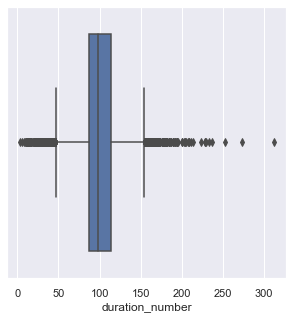

In [17]:
df['duration_number']=df['duration'].apply(lambda x: int(x.split(" ")[0]))
df_7=df[df['type']=='Movie']
sns.set(rc = {'figure.figsize':(5,5)})
sns.boxplot(data=df_7,x='duration_number')
#Value can not be considered as outliers. These will be exeptional cases

<AxesSubplot:xlabel='duration_number'>

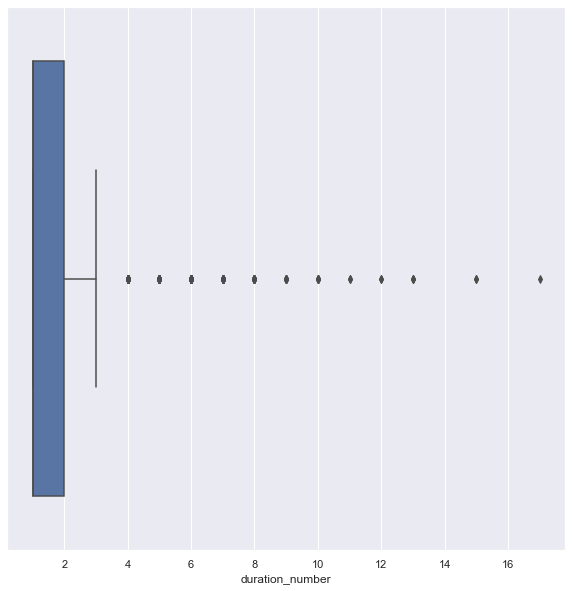

In [18]:
df_8=df[df['type']=='TV Show']
sns.set(rc = {'figure.figsize':(10,10)})
sns.boxplot(data=df_8,x='duration_number')
#Value can not be considered as outliers. These will be exeptional cases

In [19]:
#Checking for irregularity in data-4
df['duration'].value_counts()

1 Season     1793
2 Seasons     425
3 Seasons     199
90 min        152
94 min        146
             ... 
16 min          1
186 min         1
193 min         1
189 min         1
191 min         1
Name: duration, Length: 220, dtype: int64

In [20]:
#Number of null values in each columns
df.isna().sum()

show_id               0
type                  0
title                 0
director           2634
cast                825
country             831
date_added           10
release_year          0
rating                4
duration              0
listed_in             0
description           0
duration_number       0
dtype: int64

In [21]:
#Handling null values
df["director"]=df["director"].fillna("other")
df["rating"]=df["rating"].fillna("unknown")
df["cast"]=df["cast"].fillna("unknown")
df["country"]=df["country"].fillna("unknown")
df["release_year"]=df["release_year"].fillna(df["release_year"].median())

In [22]:
#Dropping duplicate values
df=df.drop_duplicates()

In [23]:
df.shape

(8807, 13)

In [24]:
# Removing unnecessary columns
df.drop(columns=['description',],inplace=True)

In [25]:
#Adding columsn
df["date_added"] = pd.to_datetime(df["date_added"])
df["year_added"] = df["date_added"].dt.year
df["month_added"]  = df["date_added"].dt.month_name()

In [26]:
#Droping row with null values in rating and duration(no. of row dropped only be 3 & 4)
df.dropna(subset=["date_added"],inplace=True)

In [27]:
df.isna().sum()

show_id            0
type               0
title              0
director           0
cast               0
country            0
date_added         0
release_year       0
rating             0
duration           0
listed_in          0
duration_number    0
year_added         0
month_added        0
dtype: int64

In [28]:
cast_list=df["cast"].apply(lambda x : x.split(",")).tolist()
df_new=pd.DataFrame(cast_list,index=df["title"])
df_new=df_new.stack()
df_new=df_new.reset_index()
df_new.rename(columns={0:"Actors"},inplace=True)
df_new.drop(['level_1'],axis=1,inplace=True)
df_new.head()

,title,Actors
0,Dick Johnson Is Dead,unknown
1,Blood & Water,Ama Qamata
2,Blood & Water,Khosi Ngema
3,Blood & Water,Gail Mabalane
4,Blood & Water,Thabang Molaba


In [29]:
df_1=df_new.merge(df[['type',	'title',	'director',	'country',	'release_year',	'rating',	'duration',	'listed_in']],on="title",how="left")
df_1.shape

(64882, 9)

In [32]:
director_list=df_1["director"].apply(lambda x : x.split(",")).tolist()
df_new=pd.DataFrame(director_list,index=df_1["title"])
df_new=df_new.stack()
df_new=df_new.reset_index()
df_new.rename(columns={0:"director"},inplace=True)
df_new.drop(['level_1'],axis=1,inplace=True)
df_2=df_new.merge(df_1[['type',	'title',"Actors",	'country',	'release_year',	'rating',	'duration',	'listed_in']],on="title",how="left")
df_2.tail(100)

,title,director,type,Actors,country,release_year,rating,duration,listed_in
750471,Zoom,Peter Hewitt,Movie,Tim Allen,United States,2006,PG,88 min,"Children & Family Movies, Comedies"
750472,Zoom,Peter Hewitt,Movie,Courteney Cox,United States,2006,PG,88 min,"Children & Family Movies, Comedies"
750473,Zoom,Peter Hewitt,Movie,Chevy Chase,United States,2006,PG,88 min,"Children & Family Movies, Comedies"
750474,Zoom,Peter Hewitt,Movie,Kate Mara,United States,2006,PG,88 min,"Children & Family Movies, Comedies"
750475,Zoom,Peter Hewitt,Movie,Ryan Newman,United States,2006,PG,88 min,"Children & Family Movies, Comedies"
...,...,...,...,...,...,...,...,...,...
750566,Zubaan,Mozez Singh,Movie,Manish Chaudhary,India,2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals"
750567,Zubaan,Mozez Singh,Movie,Meghna Malik,India,2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals"
750568,Zubaan,Mozez Singh,Movie,Malkeet Rauni,India,2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals"
750569,Zubaan,Mozez Singh,Movie,Anita Shabdish,India,2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals"


In [34]:
df_top_actors=df_2.groupby("Actors")[["title"]].aggregate({"title":"nunique",}).sort_values(by="title",ascending=False).reset_index()
df_top_actors[1:11]

,Actors,title
1,Anupam Kher,39
2,Rupa Bhimani,31
3,Takahiro Sakurai,30
4,Julie Tejwani,28
5,Om Puri,27
6,Shah Rukh Khan,26
7,Rajesh Kava,26
8,Yuki Kaji,25
9,Boman Irani,25
10,Paresh Rawal,25


In [35]:
#Top 10 Directors
df_top_director=df_2.groupby("director")[["title"]].aggregate({"title":"nunique",}).sort_values(by="title",ascending=False).reset_index()
df_top_director[1:11]
#top_director=sns.countplot("director",data=df_top_director,order=df_top_director.director.value_counts().iloc[1:11].index)
#top_director=top_director.set_xticklabels(top_director.get_xticklabels(),rotation = 90)


,director,title
1,Rajiv Chilaka,22
2,Jan Suter,18
3,Raúl Campos,18
4,Suhas Kadav,16
5,Marcus Raboy,16
6,Jay Karas,15
7,Cathy Garcia-Molina,13
8,Jay Chapman,12
9,Martin Scorsese,12
10,Youssef Chahine,12


In [36]:
country=df["country"].apply(lambda x : x.split(",")).tolist()
df_new=pd.DataFrame(country,index=df["title"])
df_new=df_new.stack()
df_new=df_new.reset_index()
df_new.rename(columns={0:"country"},inplace=True)
df_new.drop(['level_1'],axis=1,inplace=True)
df_country=df_new.merge(df[['type',	'title',"cast", "director", 'release_year', 'rating', 'duration','listed_in']],on="title",how="left")
df_country.shape

(10840, 9)

In [37]:
df_country.country.value_counts().iloc[:10]

United States     3205
India             1008
unknown            830
United Kingdom     627
 United States     479
Canada             271
Japan              258
France             212
South Korea        211
 France            181
Name: country, dtype: int64

In [38]:
#United States is repeated
df_country[df_country.country==" United States"]="United States"

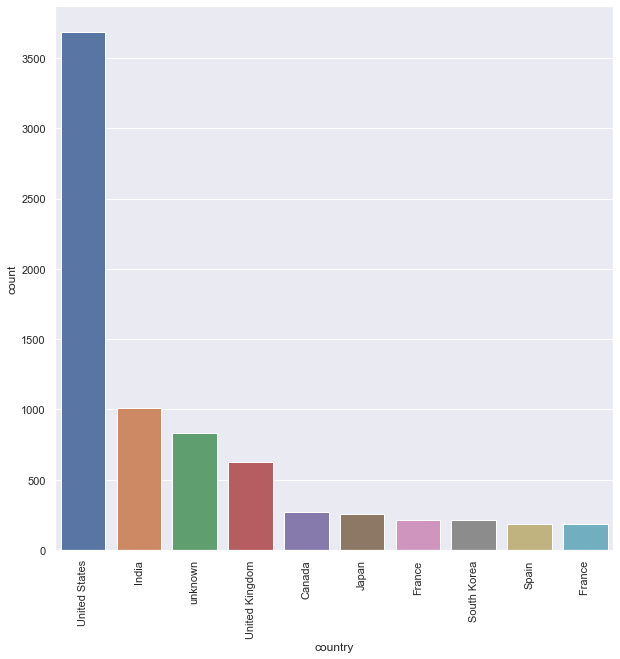

In [39]:
country_count = sns.countplot(data = df_country , x = "country",order=df_country.country.value_counts().iloc[:10].index)
country_count=country_count.set_xticklabels(country_count.get_xticklabels(),rotation = 90)


In [40]:
df_top_director=df_2.groupby("director")[["title"]].aggregate({"title":"nunique",}).sort_values(by="title",ascending=False).reset_index()
df_top_director[1:11]

,director,title
1,Rajiv Chilaka,22
2,Jan Suter,18
3,Raúl Campos,18
4,Suhas Kadav,16
5,Marcus Raboy,16
6,Jay Karas,15
7,Cathy Garcia-Molina,13
8,Jay Chapman,12
9,Martin Scorsese,12
10,Youssef Chahine,12


In [41]:
list_in=df["listed_in"].apply(lambda x : x.split(",")).tolist()
df_new=pd.DataFrame(list_in,index=df["title"])
df_new=df_new.stack()
df_new=df_new.reset_index()
df_new.rename(columns={0:"listed_in"},inplace=True)
df_new.drop(['level_1'],axis=1,inplace=True)
df_listin_country=df_new.merge(df_country[['type','title',"cast", "director", 'release_year', 'rating', 'duration',"country"]],on="title",how="left")
df_listin_country.head()

,title,listed_in,type,cast,director,release_year,rating,duration,country
0,Dick Johnson Is Dead,Documentaries,Movie,unknown,Kirsten Johnson,2020,PG-13,90 min,United States
1,Blood & Water,International TV Shows,TV Show,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",other,2021,TV-MA,2 Seasons,South Africa
2,Blood & Water,TV Dramas,TV Show,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",other,2021,TV-MA,2 Seasons,South Africa
3,Blood & Water,TV Mysteries,TV Show,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",other,2021,TV-MA,2 Seasons,South Africa
4,Ganglands,Crime TV Shows,TV Show,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",Julien Leclercq,2021,TV-MA,1 Season,unknown


In [42]:
df_top_category=df_listin_country.groupby("listed_in")[["title"]].aggregate({"title":"nunique",}).sort_values(by="title",ascending=False).reset_index()

df_top_category_new=df_top_category[1:11]

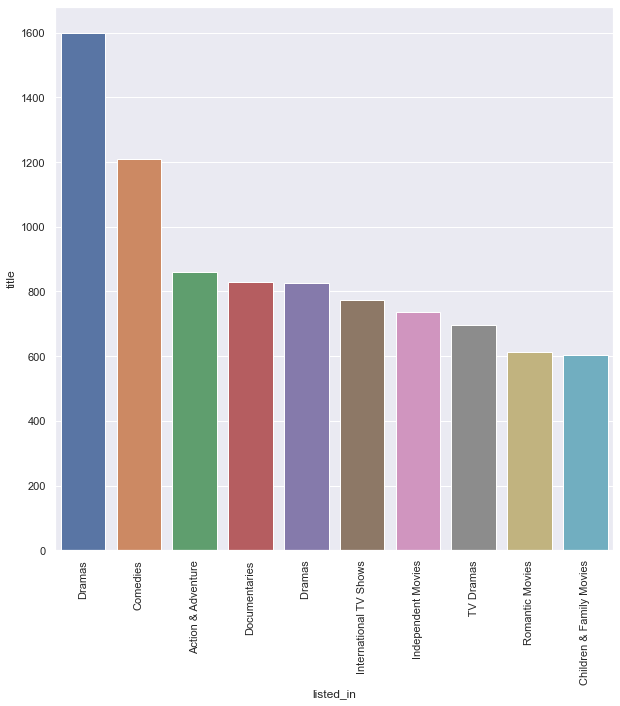

In [43]:
top_category=sns.barplot(data=df_top_category_new,x="listed_in",y="title")
top_category=top_category.set_xticklabels(top_category.get_xticklabels(),rotation = 90)

C:\Users\gokul\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


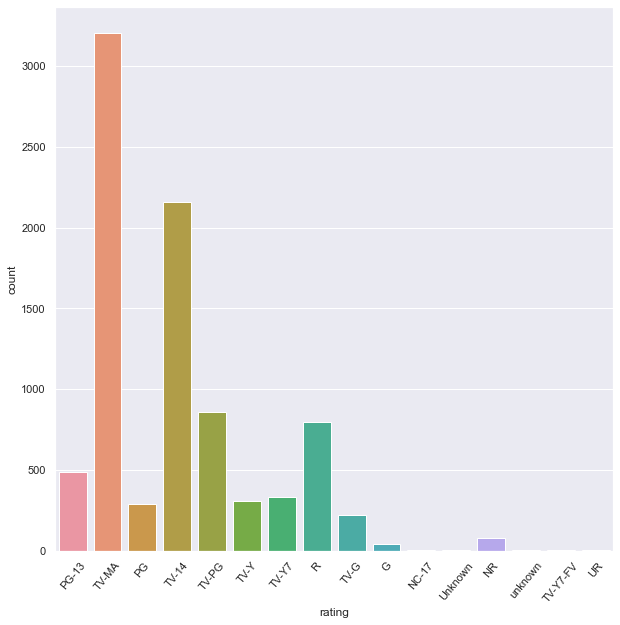

In [44]:
rating_count=sns.countplot("rating",data=df)
rating_count=rating_count.set_xticklabels(rating_count.get_xticklabels(),rotation = 50)


<AxesSubplot:xlabel='type', ylabel='count'>

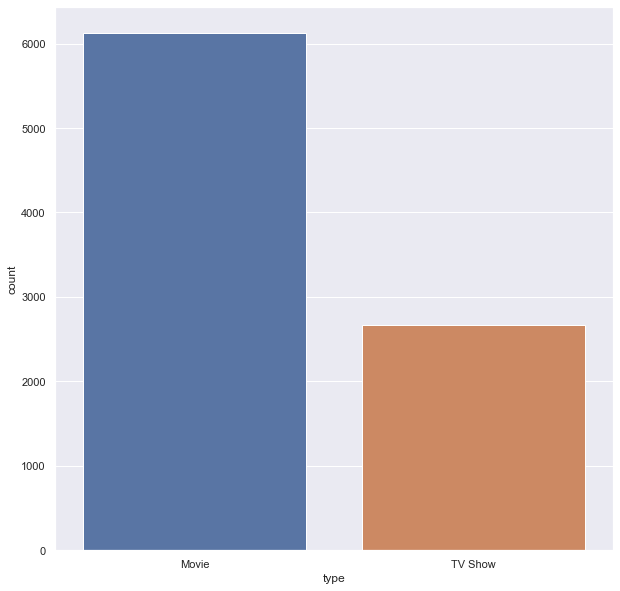

In [45]:
type_count = sns.countplot(data = df , x = "type")
type_count

[Text(0, 0, '2008.0'),
 Text(1, 0, '2009.0'),
 Text(2, 0, '2010.0'),
 Text(3, 0, '2011.0'),
 Text(4, 0, '2012.0'),
 Text(5, 0, '2013.0'),
 Text(6, 0, '2014.0'),
 Text(7, 0, '2015.0'),
 Text(8, 0, '2016.0'),
 Text(9, 0, '2017.0'),
 Text(10, 0, '2018.0'),
 Text(11, 0, '2019.0'),
 Text(12, 0, '2020.0'),
 Text(13, 0, '2021.0')]

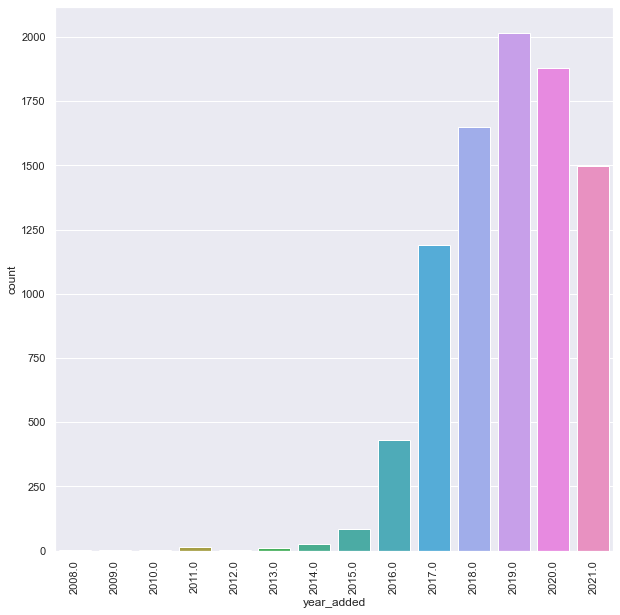

In [46]:
year_count = sns.countplot(data = df , x = "year_added")
year_count=year_count.set_xticklabels(year_count.get_xticklabels(),rotation = 90)
year_count

[Text(0, 0, 'September'),
 Text(1, 0, 'August'),
 Text(2, 0, 'July'),
 Text(3, 0, 'June'),
 Text(4, 0, 'May'),
 Text(5, 0, 'April'),
 Text(6, 0, 'March'),
 Text(7, 0, 'February'),
 Text(8, 0, 'January'),
 Text(9, 0, 'December'),
 Text(10, 0, 'November'),
 Text(11, 0, 'October')]

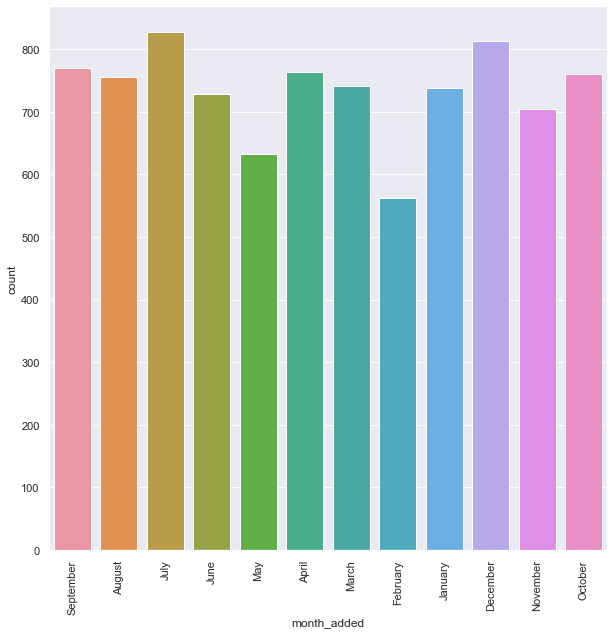

In [47]:
month_count = sns.countplot(data = df , x = "month_added")
month_count=month_count.set_xticklabels(month_count.get_xticklabels(),rotation = 90)
month_count

C:\Users\gokul\AppData\Local\Temp/ipykernel_25772/3478043833.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  country_catergory_count_india = sns.countplot(data = df[df_listin_country["country"]=='India'] , x = "listed_in",order=df_listin_country.listed_in.value_counts().iloc[:35].index)


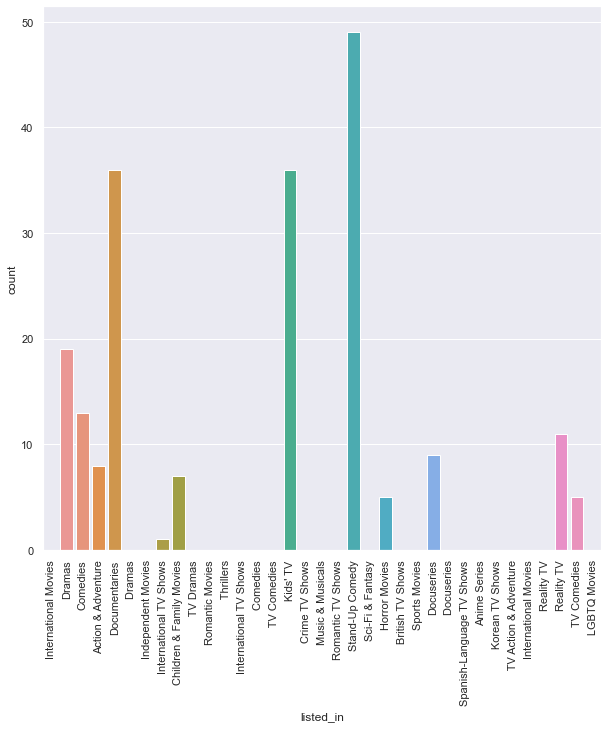

In [48]:
#Category preferred by top 3-countries
#India
country_catergory_count_india = sns.countplot(data = df[df_listin_country["country"]=='India'] , x = "listed_in",order=df_listin_country.listed_in.value_counts().iloc[:35].index)
country_catergory_count_india=country_catergory_count_india.set_xticklabels(country_catergory_count_india.get_xticklabels(),rotation = 90)

C:\Users\gokul\AppData\Local\Temp/ipykernel_25772/4162659320.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  country_catergory_count_us = sns.countplot(data = df[df_listin_country["country"]=='United States'] , x = "listed_in",order=df_listin_country.listed_in.value_counts().iloc[:35].index)


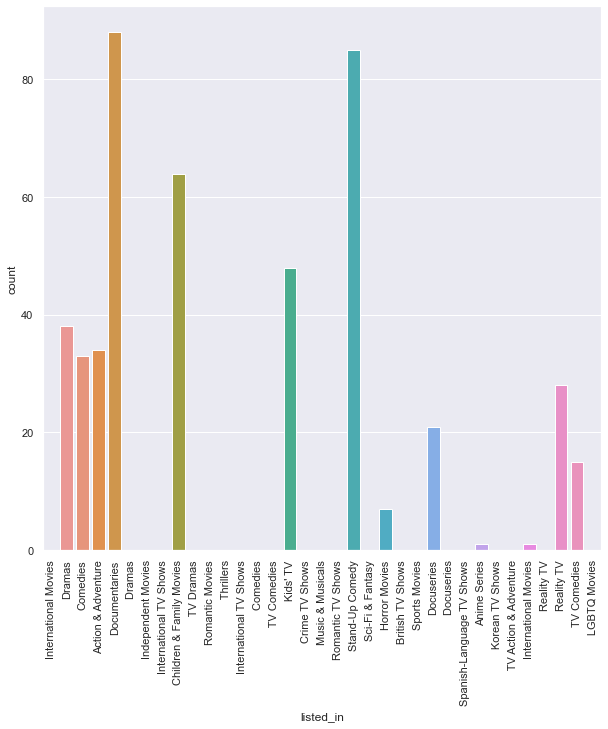

In [49]:
#United States
country_catergory_count_us = sns.countplot(data = df[df_listin_country["country"]=='United States'] , x = "listed_in",order=df_listin_country.listed_in.value_counts().iloc[:35].index)
country_catergory_count_us=country_catergory_count_us.set_xticklabels(country_catergory_count_us.get_xticklabels(),rotation = 90)

C:\Users\gokul\AppData\Local\Temp/ipykernel_25772/2558031679.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  country_catergory_count_uk = sns.countplot(data = df[df_listin_country["country"]=='United Kingdom'] , x = "listed_in",order=df_listin_country.listed_in.value_counts().iloc[:35].index)


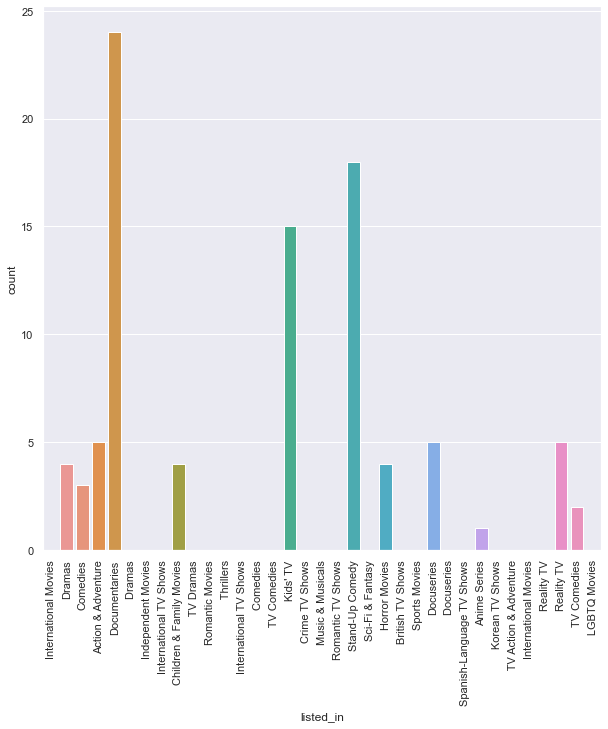

In [50]:
#United Kingdom
country_catergory_count_uk = sns.countplot(data = df[df_listin_country["country"]=='United Kingdom'] , x = "listed_in",order=df_listin_country.listed_in.value_counts().iloc[:35].index)
country_catergory_count_uk=country_catergory_count_uk.set_xticklabels(country_catergory_count_uk.get_xticklabels(),rotation = 90)

In [51]:
df_5=df_listin_country.groupby('country').listed_in.value_counts().unstack().fillna(0)
df_5=df_5[df_5.sum(axis=1) > 200]
df_5=df_5.loc[:,df_5.sum(axis=0) > 200]
df_5

listed_in,Comedies,Dramas,Independent Movies,International Movies,International TV Shows,Music & Musicals,Romantic Movies,Romantic TV Shows,Sci-Fi & Fantasy,Sports Movies,...,Children & Family Movies,Comedies,Crime TV Shows,Documentaries,Docuseries,Dramas,Horror Movies,International TV Shows,Kids' TV,Stand-Up Comedy
country,,,,,,,,,,,,,,,,,,,,,
Canada,32.0,11.0,15.0,19.0,1.0,7.0,5.0,0.0,19.0,3.0,...,40.0,8.0,1.0,9.0,0.0,25.0,13.0,1.0,25.0,0.0
France,7.0,11.0,47.0,89.0,4.0,1.0,12.0,0.0,7.0,5.0,...,13.0,10.0,4.0,17.0,1.0,84.0,5.0,2.0,16.0,0.0
Germany,6.0,9.0,23.0,45.0,10.0,3.0,4.0,0.0,10.0,3.0,...,4.0,12.0,6.0,10.0,2.0,42.0,3.0,2.0,3.0,0.0
United Kingdom,14.0,18.0,20.0,44.0,2.0,9.0,12.0,0.0,16.0,3.0,...,22.0,17.0,1.0,23.0,2.0,45.0,4.0,2.0,7.0,1.0
Australia,5.0,12.0,7.0,18.0,13.0,4.0,2.0,2.0,3.0,7.0,...,14.0,3.0,7.0,10.0,8.0,10.0,2.0,17.0,13.0,3.0
Brazil,6.0,6.0,6.0,38.0,11.0,5.0,2.0,2.0,0.0,2.0,...,7.0,13.0,6.0,11.0,5.0,12.0,0.0,15.0,2.0,9.0
Canada,23.0,9.0,26.0,38.0,7.0,6.0,19.0,1.0,7.0,10.0,...,39.0,31.0,13.0,33.0,8.0,37.0,17.0,16.0,31.0,2.0
China,9.0,14.0,0.0,42.0,7.0,2.0,7.0,20.0,7.0,0.0,...,7.0,7.0,4.0,2.0,1.0,7.0,0.0,31.0,1.0,0.0
Egypt,6.0,21.0,5.0,94.0,2.0,4.0,11.0,3.0,0.0,2.0,...,1.0,51.0,2.0,1.0,0.0,20.0,3.0,12.0,0.0,0.0


<AxesSubplot:xlabel='listed_in', ylabel='country'>

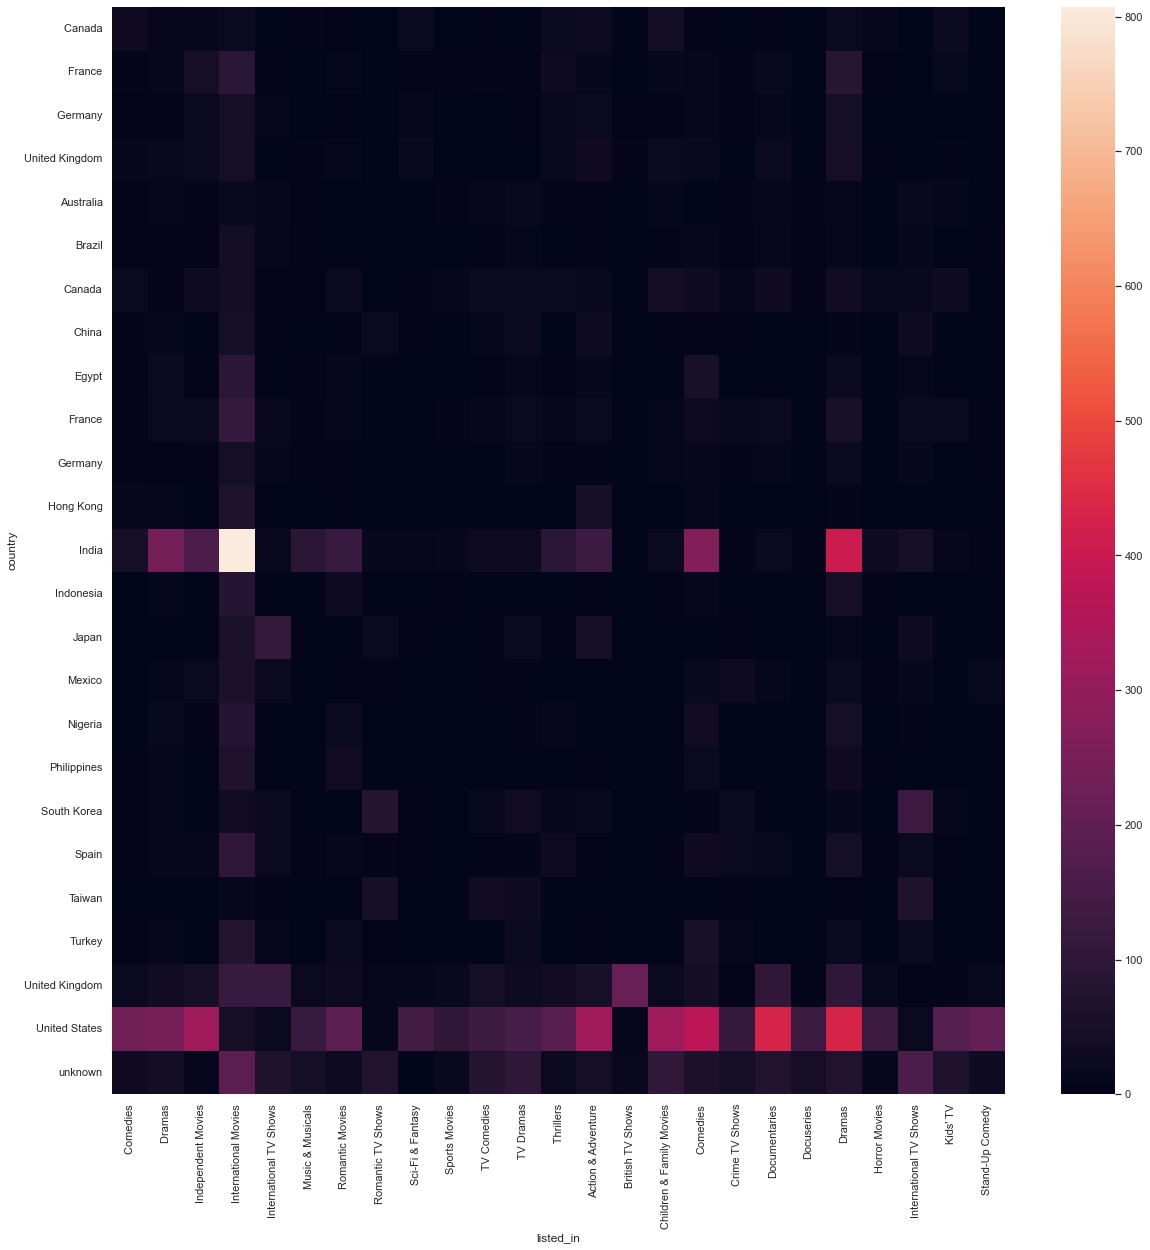

In [52]:
sns.set(rc = {'figure.figsize':(20,20)})
sns.heatmap(df_5)

In [53]:
df_6=df_country.groupby('type').country.value_counts().unstack().fillna(0)
df_6.drop("United States",inplace=True)
df_6=df_6.loc[:,df_6.sum(axis=0) > 200]
df_6=df_6.T.reset_index()
df_6
df_6 = df_6.melt('country', var_name='Movie', value_name='TV Show')
df_6

C:\Users\gokul\AppData\Local\Temp/ipykernel_25772/489370878.py:6: FutureWarning: This dataframe has a column name that matches the 'value_name' column name of the resulting Dataframe. In the future this will raise an error, please set the 'value_name' parameter of DataFrame.melt to a unique name.
  df_6 = df_6.melt('country', var_name='Movie', value_name='TV Show')


,country,Movie,TV Show
0,Canada,Movie,187.0
1,France,Movie,148.0
2,India,Movie,927.0
3,Japan,Movie,85.0
4,South Korea,Movie,47.0
5,United Kingdom,Movie,382.0
6,United States,Movie,2364.0
7,unknown,Movie,440.0
8,Canada,TV Show,84.0
9,France,TV Show,64.0


<AxesSubplot:xlabel='country', ylabel='TV Show'>

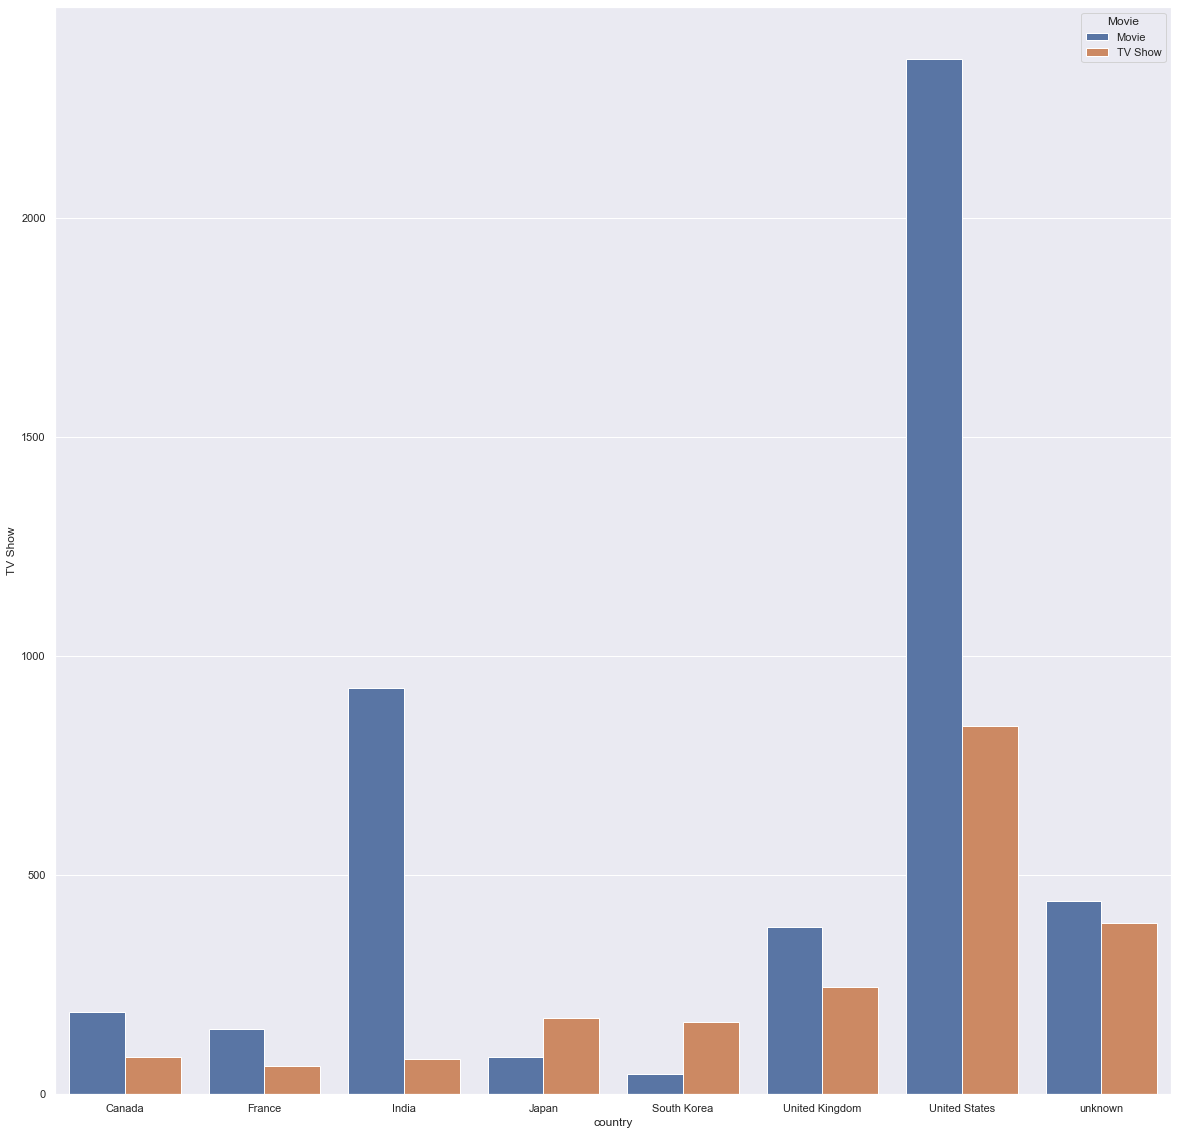

In [54]:
sns.barplot(data=df_6,x="country",y='TV Show',hue="Movie")